In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams["figure.figsize"] = (12, 6)
sns.set()


In [200]:
data = pd.read_csv("./datasets/indian_food.csv")
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [201]:
data.shape

(255, 9)

In [202]:
data.name.unique()

array(['Balu shahi', 'Boondi', 'Gajar ka halwa', 'Ghevar', 'Gulab jamun',
       'Imarti', 'Jalebi', 'Kaju katli', 'Kalakand', 'Kheer', 'Laddu',
       'Lassi', 'Nankhatai', 'Petha', 'Phirni', 'Rabri', 'Sheera',
       'Singori', 'Sohan halwa', 'Sohan papdi', 'Chhena jalebi',
       'Chhena kheeri', 'Chhena poda', 'Cham cham', 'Kheer sagar',
       'Ledikeni', 'Lyangcha', 'Malapua', 'Mihidana', 'Misti doi',
       'Pantua', 'Pithe', 'Rasabali', 'Ras malai', 'Rasgulla', 'Sandesh',
       'Adhirasam', 'Ariselu', 'Bandar laddu', 'Chikki', 'Dharwad pedha',
       'Double ka meetha', 'Gavvalu', 'Kakinada khaja', 'Kuzhi paniyaram',
       'Mysore pak', 'Obbattu holige', 'Palathalikalu', 'Poornalu',
       'Pongal', 'Pootharekulu', 'Qubani ka meetha', 'Sheer korma',
       'Unni Appam', 'Kajjikaya', 'Anarsa', 'Basundi', 'Dhondas',
       'Doodhpak', 'Mahim halwa', 'Modak', 'Shankarpali', 'Shrikhand',
       'Sutar feni', 'Maach Jhol', 'Pork Bharta', 'Chak Hao Kheer',
       'Galho', 'Aloo gob

In [203]:
data.name.nunique()

255

In [204]:
# stripping the extra spaces if any and coverting to lower case
data.name=data.name.str.strip()
data.name=data.name.str.lower()
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,til pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,mawa bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [205]:
data.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [206]:
data.flavor_profile.value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [207]:
data.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [208]:
data.region.value_counts()

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [209]:
data.state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Bihar               3
Goa                 3
Jammu & Kashmir     2
Madhya Pradesh      2
Manipur             2
Haryana             1
Uttarakhand         1
Chhattisgarh        1
NCT of Delhi        1
Nagaland            1
Tripura             1
Name: state, dtype: int64

In [210]:
data.state.unique()
len(data.state.unique())

25

In [211]:
# ##### observation
# ###### so here we have 255 dishes and 9 columns associated with each of them which describe as follow
# - name: name of the dish
# - ingredients: ingredients which are used to make particular dish
# - diet: It indicates that whether the dish is veg or non- veg
# - prep_time: prepartion time
# - cook_time: cooking time
# - flavor_profile: flavor profile include that whether the dish is spicy or sweet etc
# - course: course is a course of meal, the course might be main course, snack or dessert etc
# - state: state where the dish is famous or born
# - region: region where the state belongs

In [212]:
data.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [213]:
data[data.region.isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [214]:
data.loc[data.state=="Uttar Pradesh"]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [215]:
data.region.fillna("North",inplace=True)

In [216]:
data[data.state=="Uttar Pradesh"].region

6      North
13     North
15     North
18     North
90     North
95     North
97     North
105    North
110    North
Name: region, dtype: object

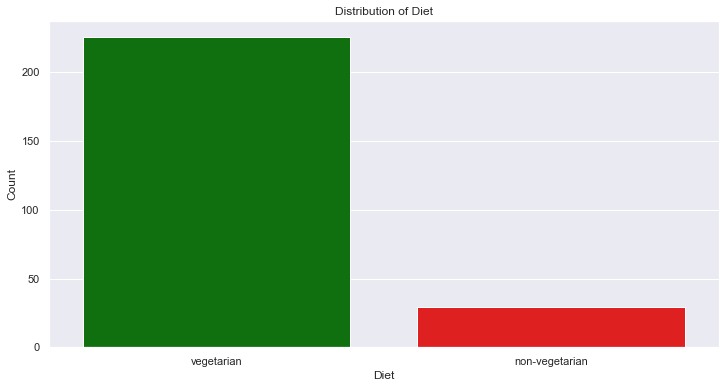

In [217]:


# plotting
data.diet = data.diet.str.replace(" ", "-")
sns.countplot(data = data, x = "diet", palette = ["green", "red"])
plt.xlabel("Diet")
plt.ylabel("Count")
plt.title("Distribution of Diet")
plt.show()

In [218]:
data.flavor_profile.value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [219]:
data.flavor_profile= data.flavor_profile.replace("-1", "other")

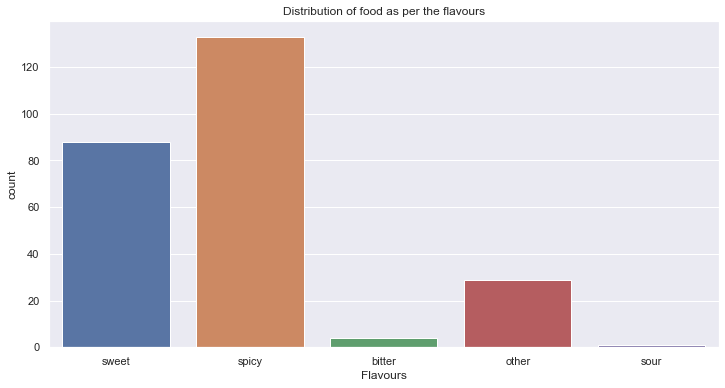

In [220]:
# ploting the flavor_profile

sns.countplot(data = data, x = "flavor_profile")
plt.xlabel("Flavours")
plt.title("Distribution of food as per the flavours")
plt.show()

In [221]:
data.state.value_counts().head()

Gujarat        35
Punjab         32
Maharashtra    30
West Bengal    24
-1             24
Name: state, dtype: int64

In [222]:

data.loc[data.state == "-1"]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
115,rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


In [223]:
data.state =data.state.replace("-1", "All State")

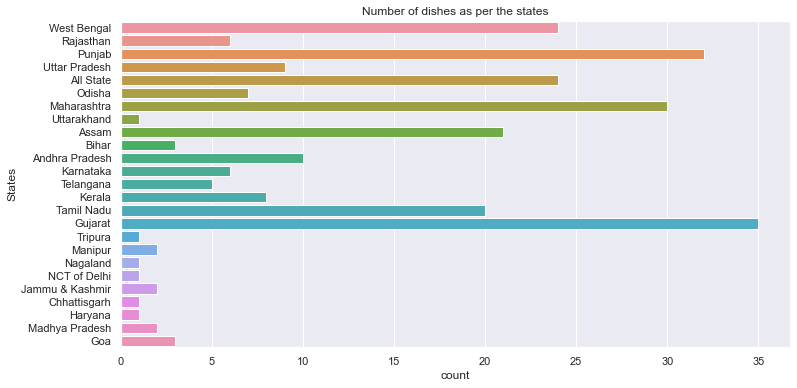

In [224]:
#plotting the number of dishes as per the states

sns.countplot(data = data, y = "state")
plt.title("Number of dishes as per the states")
plt.ylabel("States")
plt.show()

In [225]:
# let's look at the region
data.region.value_counts()
data[data.region == "-1"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,All State,-1
9,kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,All State,-1
10,laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,All State,-1
12,nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,All State,-1
94,khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,All State,-1


In [226]:

data.region = data.region.replace("-1", "All Region")

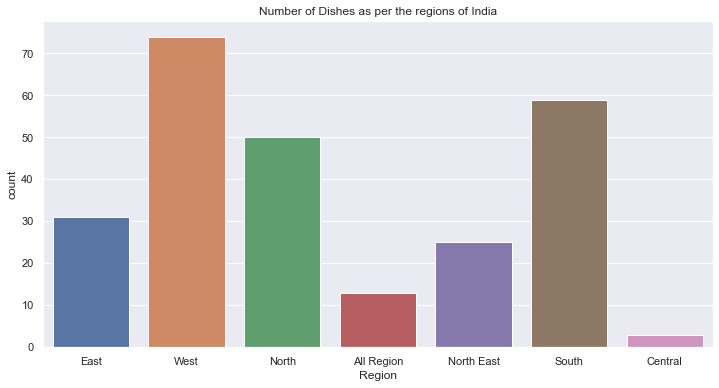

In [227]:
# let's plot number of dishes are famous in particular region of india

sns.countplot(data = data, x = "region")
plt.title("Number of Dishes as per the regions of India")
plt.xlabel("Region")
plt.show()

In [228]:

data.prep_time.unique()

array([ 45,  80,  15,  10,  20,   5,  30,  -1,  40,  25, 480, 180, 240,
       120,  60, 500, 150, 360, 495,  70,  35,  12], dtype=int64)

In [229]:
data.loc[data.prep_time == -1].head()
# will resolve later

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non-vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


In [230]:

data.cook_time.unique()

array([ 25,  30,  60,  40,  50,  20,   5,  45, 120,  35,  90,  75,  15,
       720,  55,  -1,  10,   2,   6], dtype=int64)

In [231]:
data.loc[data.cook_time == -1].head()
# will solve later

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non-vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


<AxesSubplot:xlabel='prep_time', ylabel='cook_time'>

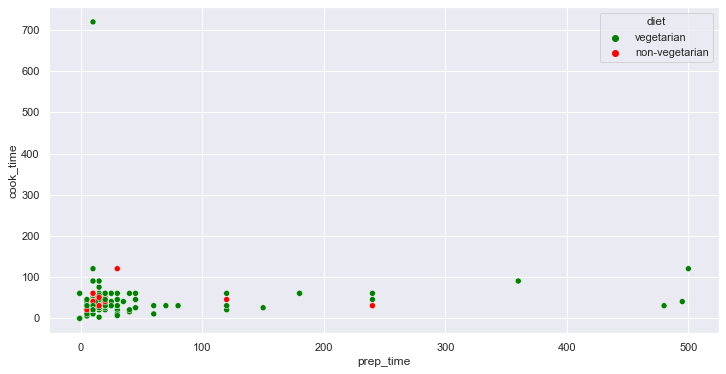

In [232]:
# let's plot prep time and cook time

sns.scatterplot(data = data, x = "prep_time", y = "cook_time",hue = "diet", palette=["green", "red"])

In [233]:
# let's look at to the ingrediets which are used to make a particular dish

# first let's convert all ingredients into lower case for preventing case sensitive
data.ingredients = data.ingredients.str.lower()
# so here ingredients are a comman seprated
# let's split those ingredients and divide into veg and non-veg proportion

veg_ingredients =data.loc[data.diet == "vegetarian", "ingredients"]
non_veg_ingredients =data.loc[data.diet == "non-vegetarian", "ingredients"]

# let's check size of both ingredients and verify the whether the ingredients of all dishes are stored or not
# our total dishes are 255
veg_ingredients.size + non_veg_ingredients.size

255

In [234]:
veg_ingredients

0                        maida flour, yogurt, oil, sugar
1                                gram flour, ghee, sugar
2           carrots, milk, sugar, ghee, cashews, raisins
3      flour, ghee, kewra, milk, clarified butter, su...
4      milk powder, plain flour, baking powder, ghee,...
                             ...                        
250              glutinous rice, black sesame seeds, gur
251    coconut milk, egg yolks, clarified butter, all...
252    cottage cheese, dry dates, dried rose petals, ...
253    milk powder, dry fruits, arrowroot powder, all...
254    brown rice, fennel seeds, grated coconut, blac...
Name: ingredients, Length: 226, dtype: object

In [235]:
non_veg_ingredients

64         fish, potol, tomato, chillies, ginger, garlic
65      boiled pork, onions, chillies, ginger and garlic
67              rice, axone, salt, water, chillies, pork
75     chicken thighs, basmati rice, star anise, swee...
76     chicken, greek yogurt, cream, garam masala pow...
79     chicken, dahi, sesame seeds, garam masala powd...
80     naan bread, tomato sauce, skinless chicken bre...
81     chicken, whole wheat bread, rice flour, garam ...
122    greek yogurt, garam masala, kasuri methi, mari...
123    chickpea flour, biryani masala powder, yogurt,...
137    beef, coconut, garam masala, curry leaves, gre...
163    meat curry powder, chicken chunks, ginger, tom...
167    baingan, fish, coconut oil, fresh coconut, ginger
172    bombay duck, malvani masala, rice flour, bomba...
211    chicken, coconut oil, wine vinegar, ginger, gr...
223                         rice, eggs, carrot, beetroot
225          potatoes, mustard oil, fish, green chillies
226      ridge gourd, fish, lem

In [236]:
veg_ingredients.str.split(",")

0                   [maida flour,  yogurt,  oil,  sugar]
1                            [gram flour,  ghee,  sugar]
2      [carrots,  milk,  sugar,  ghee,  cashews,  rai...
3      [flour,  ghee,  kewra,  milk,  clarified butte...
4      [milk powder,  plain flour,  baking powder,  g...
                             ...                        
250          [glutinous rice,  black sesame seeds,  gur]
251    [coconut milk,  egg yolks,  clarified butter, ...
252    [cottage cheese,  dry dates,  dried rose petal...
253    [milk powder,  dry fruits,  arrowroot powder, ...
254    [brown rice,  fennel seeds,  grated coconut,  ...
Name: ingredients, Length: 226, dtype: object

In [237]:
# let's count those ingredients for getting that how many dishes are used that particular ingrediets

# let's remove unnecessary space
veg_ingredients = veg_ingredients.str.strip()
non_veg_ingredients = non_veg_ingredients.str.strip()

veg_cleaned_ingredients = []
non_veg_cleaned_ingredients = []

for i in veg_ingredients.str.split(","): # split by "," & iterate through all the ingredients and append it to list
    veg_cleaned_ingredients += i

for i in non_veg_ingredients.str.split(","):#split by , & iterate through all the ingredients and append it to list
    non_veg_cleaned_ingredients += i

In [238]:
veg_cleaned_ingredients

['maida flour',
 ' yogurt',
 ' oil',
 ' sugar',
 'gram flour',
 ' ghee',
 ' sugar',
 'carrots',
 ' milk',
 ' sugar',
 ' ghee',
 ' cashews',
 ' raisins',
 'flour',
 ' ghee',
 ' kewra',
 ' milk',
 ' clarified butter',
 ' sugar',
 ' almonds',
 ' pistachio',
 ' saffron',
 ' green cardamom',
 'milk powder',
 ' plain flour',
 ' baking powder',
 ' ghee',
 ' milk',
 ' sugar',
 ' water',
 ' rose water',
 'sugar syrup',
 ' lentil flour',
 'maida',
 ' corn flour',
 ' baking soda',
 ' vinegar',
 ' curd',
 ' water',
 ' turmeric',
 ' saffron',
 ' cardamom',
 'cashews',
 ' ghee',
 ' cardamom',
 ' sugar',
 'milk',
 ' cottage cheese',
 ' sugar',
 'milk',
 ' rice',
 ' sugar',
 ' dried fruits',
 'gram flour',
 ' ghee',
 ' sugar',
 'yogurt',
 ' milk',
 ' nuts',
 ' sugar',
 'refined flour',
 ' besan',
 ' ghee',
 ' powdered sugar',
 ' yoghurt',
 ' green cardamom',
 'firm white pumpkin',
 ' sugar',
 ' kitchen lime',
 ' alum powder',
 'rice',
 ' sugar',
 ' nuts',
 'condensed milk',
 ' sugar',
 ' spices',
 ' n

In [239]:
non_veg_cleaned_ingredients

['fish',
 ' potol',
 ' tomato',
 ' chillies',
 ' ginger',
 ' garlic',
 'boiled pork',
 ' onions',
 ' chillies',
 ' ginger and garlic',
 'rice',
 ' axone',
 ' salt',
 ' water',
 ' chillies',
 ' pork',
 'chicken thighs',
 ' basmati rice',
 ' star anise',
 ' sweet',
 ' green chillies',
 'chicken',
 ' greek yogurt',
 ' cream',
 ' garam masala powder',
 ' cashew nuts',
 ' butter',
 'chicken',
 ' dahi',
 ' sesame seeds',
 ' garam masala powder',
 ' cashew nuts',
 ' saffron',
 'naan bread',
 ' tomato sauce',
 ' skinless chicken breasts',
 ' heavy cream',
 ' garam masala',
 'chicken',
 ' whole wheat bread',
 ' rice flour',
 ' garam masala powder',
 ' whole egg',
 'greek yogurt',
 ' garam masala',
 ' kasuri methi',
 ' marinade',
 ' mustard oil',
 'chickpea flour',
 ' biryani masala powder',
 ' yogurt',
 ' fish fillets',
 ' green bell pepper',
 'beef',
 ' coconut',
 ' garam masala',
 ' curry leaves',
 ' green chilies',
 ' chili powder',
 'meat curry powder',
 ' chicken chunks',
 ' ginger',
 ' to

In [240]:
# let's make a series of veg and non veg ingredients

final_veg_ingredients = pd.Series(veg_cleaned_ingredients)
final_non_veg_ingredients = pd.Series(non_veg_cleaned_ingredients)

# let's remove extra spaces
final_veg_ingredients = final_veg_ingredients.str.strip()
final_non_veg_ingredients = final_non_veg_ingredients.str.strip()

# let's count how many time ingredients are repeated and make a data frame
final_veg_ingredients = final_veg_ingredients.value_counts().reset_index()
final_veg_ingredients.columns = ["ingredients", "count"]

final_non_veg_ingredients = final_non_veg_ingredients.value_counts().reset_index()
final_non_veg_ingredients.columns = ["ingredients", "count"]

In [241]:
final_non_veg_ingredients
final_veg_ingredients

,ingredients,count
0,sugar,47
1,ghee,25
2,urad dal,25
3,curry leaves,24
4,garam masala,23
...,...,...
316,red pepper,1
317,soaked rice,1
318,yellow moong daal,1
319,split pigeon peas,1


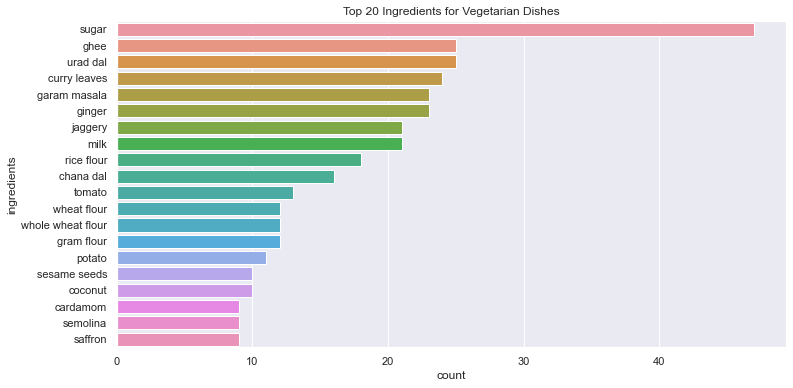

In [242]:
# let's plot a top 20 vegetarian ingredients

sns.barplot(data = final_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Vegetarian Dishes")
plt.show()

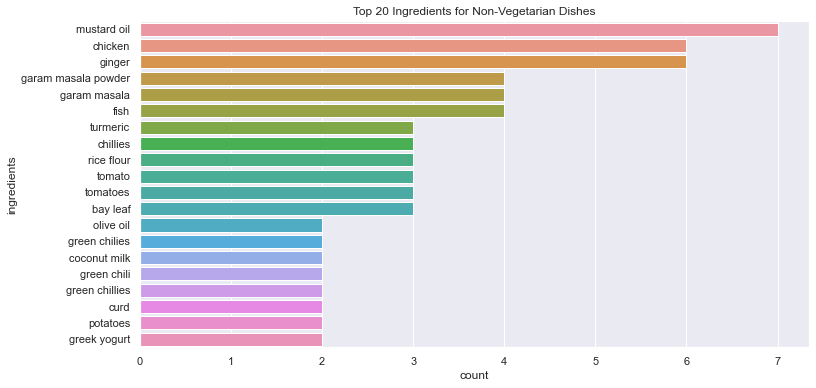

In [243]:
# let's plot top 20 non vegetarian ingredients

sns.barplot(data = final_non_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Non-Vegetarian Dishes")
plt.show()

Feature Engineering

In [244]:
data.loc[(data.prep_time==-1) | (data.cook_time==-1)]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,sohan papdi,"gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,chhena kheeri,"chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,pork bharta,"boiled pork, onions, chillies, ginger and garlic",non-vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,paravannam,"raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,poriyal,"chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
167,kolim jawla,"baingan, fish, coconut oil, fresh coconut, ginger",non-vegetarian,-1,-1,spicy,main course,Maharashtra,West
172,bombil fry,"bombay duck, malvani masala, rice flour, bomba...",non-vegetarian,-1,-1,spicy,main course,Maharashtra,West
185,ghooghra,"dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West


In [245]:
###### using all the features except prep_time and cook_time because there are some value missing in prep _time and cook_time features


cdata = data.copy()
cdata.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [246]:
# ##### feature selection of ingredients
# - using only top 20 vegetarian ingredients and top 20 non-vegetarian ingredients as features

In [247]:
# let's take top 20 veg and non-veg ingredients and merge it and make our final ingredient feature

top_veg_ingredients = final_veg_ingredients.head(20)
top_non_veg_ingredients = final_non_veg_ingredients.head(20)

# here let's append both and make our final ingredients

final_ingredients = top_veg_ingredients.append(top_non_veg_ingredients).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,ghee,25
2,urad dal,25
3,curry leaves,24
4,garam masala,23


In [248]:
final_ingredients[final_ingredients.ingredients.duplicated(keep = False)].reset_index(drop = True)

,ingredients,count
0,garam masala,23
1,ginger,23
2,rice flour,18
3,tomato,13
4,ginger,6
5,garam masala,4
6,rice flour,3
7,tomato,3


In [249]:
# so here i can see that some of the ingredients are found as duplicated so let's merge it using group by

final_ingredients = final_ingredients.groupby("ingredients")["count"].sum().reset_index()
# let's sort it by count
final_ingredients = final_ingredients.sort_values("count", ascending = False).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,ginger,29
2,garam masala,27
3,ghee,25
4,urad dal,25


In [250]:
# let's find out the total ingredients

final_ingredients.ingredients.nunique()
# so we have total 35 ingredients

36

In [251]:
# now let's do one hot encoding to ingredients
# so here in our data set i have a comma separated ingredients so i use contain() of string to match
# our final ingredients and if it is found then i put 1 other wise 0
for i in final_ingredients.ingredients:
    cdata[i] = 0 # here i create a col``umn of particular ingredients and assign all value as 0
    cdata.loc[cdata.ingredients.str.contains(i), [i]] = 1
    # above i put 1 on that column which dishes has include that particular ingredients

In [252]:
cdata

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,bay leaf,chillies,potatoes,olive oil,green chilies,green chili,greek yogurt,curd,coconut milk,green chillies
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,0
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,1,...,0,0,0,0,0,0,0,0,0,0
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,0
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,til pitha,"glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,0,...,0,0,0,0,0,0,0,0,0,0
251,bebinca,"coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,0,...,0,0,0,0,0,0,0,0,1,0
252,shufta,"cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North,0,...,0,0,0,0,0,0,0,0,0,0
253,mawa bati,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
# feature selection of diet

In [254]:
# let's encode veg and non veg using label encoding
# .............................................................
# here i drop first column which is non vegetarian for preventing dummy variable trap
# .............................................................
diet_encoding = pd.get_dummies(data.diet, drop_first=True)
# diet_encoding[diet_encoding.vegetarian==0]
diet_encoding


,vegetarian
0,1
1,1
2,1
3,1
4,1
...,...
250,1
251,1
252,1
253,1


In [255]:
# now let's concat it with our "data" data frame
cdata = pd.concat([cdata, diet_encoding], axis = 1)
cdata.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,chillies,potatoes,olive oil,green chilies,green chili,greek yogurt,curd,coconut milk,green chillies,vegetarian
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,1,...,0,0,0,0,0,0,0,0,0,1
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1


In [256]:
# feature selection of flavor_profile

In [258]:
# let's encode flavor_profile using one hot encoding

# here i drop a first column which is bitter for preventing dummy variable trap
flavor_profile_encoding = pd.get_dummies(data.flavor_profile, drop_first=True)
flavor_profile_encoding

,other,sour,spicy,sweet
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
250,0,0,0,1
251,0,0,0,1
252,0,0,0,1
253,0,0,0,1


In [260]:
# now let's concat it with our main "data" data frame

cdata = pd.concat([cdata, flavor_profile_encoding], axis = 1)
cdata.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,green chillies,vegetarian,other,sour,spicy,sweet,other,sour,spicy,sweet
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,1,0,0,0,1,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,1,0,0,0,1,0,0,0,1


In [261]:
# feature selection of course

In [262]:
# let's encode course using one hot encoding

# here i drop first column which is dessert for preventing dummy variable trap
course_encoding = pd.get_dummies(data.course, drop_first = True)
course_encoding.head(2)

,main course,snack,starter
0,0,0,0
1,0,0,0


In [263]:
# let's concat it with our main "data" data frame

cdata = pd.concat([cdata, course_encoding], axis = 1)
cdata.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,sour,spicy,sweet,other,sour,spicy,sweet,main course,snack,starter
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,1,0,0,0,1,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,1,0,0,0,1,0,0,0


In [265]:
# feature selection of state

In [266]:
# let's encode the state using one hot encoding

# here i drop first column which is All State for preventing dummy variable trap
state_encoding = pd.get_dummies(data.state, drop_first = True)
state_encoding.head(2)

,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [267]:
# let's concat it with our main "data" data frame

cdata = pd.concat([cdata, state_encoding], axis = 1)
cdata.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,1,0,0,0,0,0,0


In [268]:
# feature selection region

In [269]:
# let's encode region using one hot encoding

# here i drop first column which is All Region for preventing dummy variable trap
region_encoding = pd.get_dummies(data.region, drop_first = True)
region_encoding.head(2)

,Central,East,North,North East,South,West
0,0,1,0,0,0,0
1,0,0,0,0,0,1


In [270]:
# let's concat it with main "data" data frame

cdata = pd.concat([cdata, region_encoding], axis = 1)
cdata.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,1,0,1,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


In [271]:
# creating final data frame

In [272]:
# let's create a final data frame
# let's remove unnecessary columns which are not required not and store it as final_data

final_data = cdata.drop(columns = ['ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'])

final_data.head()

,name,sugar,ginger,garam masala,ghee,urad dal,curry leaves,milk,jaggery,rice flour,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,boondi,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,gajar ka halwa,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,ghevar,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,gulab jamun,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [273]:
# here i'm going to use Nearest Neighbors using cosine similarity so for model purpose let's take name column
# as a index

final_data.set_index("name", inplace = True)
final_data.head()

,sugar,ginger,garam masala,ghee,urad dal,curry leaves,milk,jaggery,rice flour,chana dal,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
name,,,,,,,,,,,,,,,,,,,,,
balu shahi,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
boondi,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
gajar ka halwa,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ghevar,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
gulab jamun,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


Model Builiding

In [274]:
# here i'm going to use cosine similarity to recommend the cuisine
# cosine similarity is nothing but a degree between two data points or two similar type of data

# here i'm going to use Nearest Neighbors for implementing cosine distance
# consine distance = 1 - consine similarity

# here i use Nearest Neighbors with metric cosine and brute algorithm

from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = "cosine", algorithm = "brute")
model.fit(final_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [297]:
# now our model is ready so let's test it

picked_cuisine = final_data.index[np.random.choice(final_data.shape[0])]
picked_cuisine

'laddu'

In [298]:
# now let's find similarity or recommened cuisine using our model
# our model return distance and index
# distance indicates  how far that similarity of that recommended cuisine with our picked cuisine
# index indicates a index of our final data which is a name of cuisine

# here i want 10 recommended cuisine for my picked cuisine

distance, cuisine_index = model.kneighbors(final_data[final_data.index == picked_cuisine], n_neighbors = 11)

In [299]:
distance

array([[0.        , 0.1339746 , 0.16666667, 0.16666667, 0.22540333,
        0.22848325, 0.22848325, 0.22848325, 0.22848325, 0.22848325,
        0.26970326]])

In [300]:
cuisine_index

array([[10,  1,  7, 12, 19, 25, 28, 20, 63, 30, 96]], dtype=int64)

In [301]:
# let's print it in proper way

# these are 2D arrays so let's convert it into 1D

distance = distance.flatten()
cuisine_index = cuisine_index.flatten()

# probably first one is always our picked cuisine
print("Recommendation for ", picked_cuisine, " are following")

count = 1
for i in range(cuisine_index.size):
    if final_data.index[cuisine_index[i]] == picked_cuisine:
        continue
    print(count, ". ", final_data.index[cuisine_index[i]], " with distance ", distance[i])
    count += 1

Recommendation for  laddu  are following
1 .  boondi  with distance  0.1339745962155613
2 .  kaju katli  with distance  0.1666666666666664
3 .  nankhatai  with distance  0.1666666666666664
4 .  sohan papdi  with distance  0.22540333075851648
5 .  ledikeni  with distance  0.2284832501895404
6 .  mihidana  with distance  0.2284832501895404
7 .  chhena jalebi  with distance  0.2284832501895404
8 .  sutar feni  with distance  0.2284832501895404
9 .  pantua  with distance  0.2284832501895404
10 .  kulfi falooda  with distance  0.26970325665977846


In [303]:
# let's export our main data for showing data on web app
data.to_csv("cleaned_data.csv", index = False)
# let's export our final_data, it will used on frontend for getting recommendation
final_data.to_csv("model_data.csv")

In [304]:
# let's export model using pickle file

import pickle   

with open("model.pickle", "wb") as f:
    pickle.dump(model, f)